In [1]:
#Importing all of the files
%matplotlib notebook

import os,sys,re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Setting all of the results

#Stripped sub-results files, stripped out everything but the relevant printout data
file = 'training.txt'
restartFile = 'generation.txt'

#Regex-like patters to identify strings
restartPattern = 'Restarting the service at '
pattern = re.compile('step [0-9]+ - loss = [0-9]+.[0-9]*, \([0-9]+.[0-9]* sec\/step\)')
numbah = re.compile(r'[0-9]+\.?[0-9]*')
restartTimePattern = re.compile(r'[0-9]{13}')

#Manually set these based on best averaging and hard system stops
trendline = 50
stoppedSteps = [343, 870, 1010]

#Containers
results = {}
restart = []

#Retrieved from the raw audio sample files
genreLyst = {
    'classical': 365, 
    'hardcore': 275, 
    'hip': 1418, 
    'metal': 3179, 
    'rock': 3683
}

In [3]:
#Parsing the raw print out of the results file
with open(file, 'r') as foil:
    line, restartFlag = foil.readline(), False
    while line:
        #if the line matches the following syntax:
        # step ##### - loss = #.###, (##.### sec/step)
        isStep = pattern.match(line) != None and len(numbah.findall(line)) == 3
        if isStep:
            #Retrieving all of the numbers from the line 
            step, loss, speed = numbah.findall(line)
            results[step] = {'loss':loss, 'speed':speed}
            if restartFlag:
                restartFlag = False
                restart += [int(step)-1]
        elif line.startswith(restartPattern):
            restartFlag = True
        line = foil.readline()

In [4]:
#Transforming the keys to a numeric list
x = [float(x) for x in results.keys()]

#Retrieving the loss and speed values as a numeric list
loss, speed = [float(results[x]['loss']) for x in results.keys()], [float(results[x]['speed']) for x in results.keys()]

#Retrieving the total and the max for the speed and the steps
totalTime, maxStep = sum(speed), max([int(x) for x in list(results.keys())])

<IPython.core.display.Javascript object>


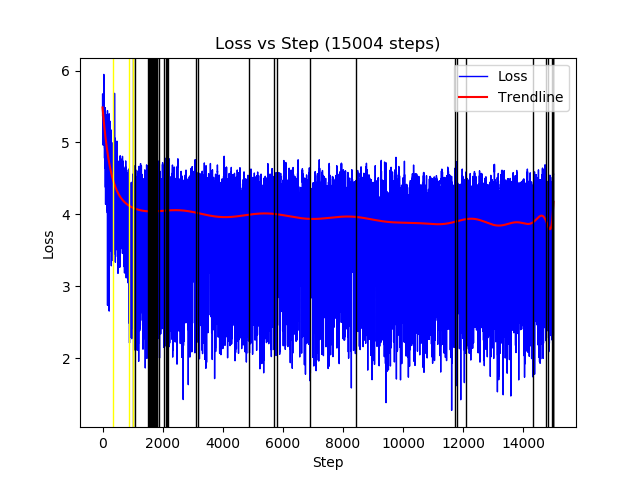

/home/maister/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:626: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/maister/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
/home/maister/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


In [5]:
fig = plt.figure(0)
ax = fig.add_subplot(111)
ax.plot(x, loss, color='blue', label='Loss', linewidth=1)
ax.set(title='Loss vs Step ('+str(maxStep)+' steps)', ylabel='Loss', xlabel='Step')

#Trendline
z = np.polyfit(x, loss, trendline)
p = np.poly1d(z)
ax.plot(x,p(x),'r-', label='Trendline')

for stop in restart:
    plt.axvline(x=stop, linewidth='1', color = 'black')
for stop in stoppedSteps:
    plt.axvline(x=stop, linewidth='1', color = 'yellow')

ax.legend(loc='upper right')

<IPython.core.display.Javascript object>


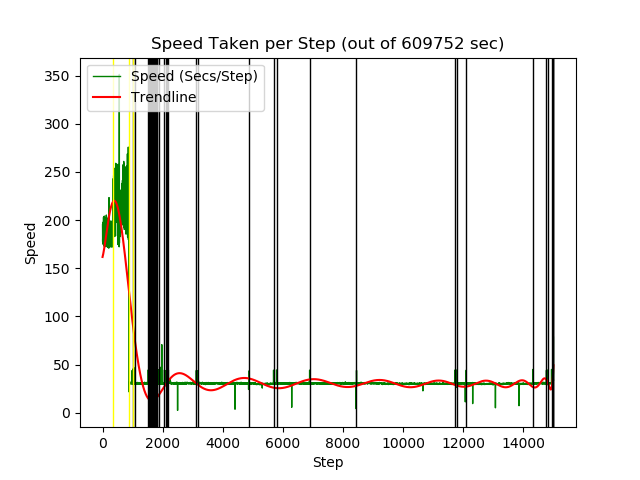

/home/maister/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


In [6]:
fig2 = plt.figure(1)
axs = fig2.add_subplot(111)
axs.plot(x, speed, color='green', label='Speed (Secs/Step)', linewidth=1)
axs.set(title='Speed Taken per Step (out of '+str(int(totalTime)) +' sec)', ylabel='Speed', xlabel='Step')

#Trendline
zTwo = np.polyfit(x, speed, trendline)
pTwo = np.poly1d(zTwo)
axs.plot(x,pTwo(x),'r-', label='Trendline')

for stop in restart:
    plt.axvline(x=stop, linewidth='1', color = 'black')
for stop in stoppedSteps:
    plt.axvline(x=stop, linewidth='1', color = 'yellow')

axs.legend(loc='upper left')

<IPython.core.display.Javascript object>


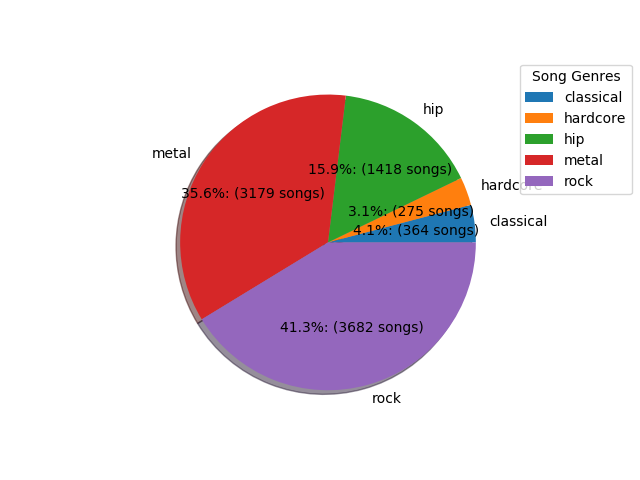

In [7]:
genreCounts = [int(genreLyst[x]) for x in genreLyst.keys()]

#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%: ({:d} songs)".format(pct, absolute)

fig3 = plt.figure(2)
axss = fig3.add_subplot(111)
wedges, texts, autotexts = axss.pie(genreCounts, 
                                    labels=genreLyst.keys(), 
                                    autopct=lambda pct: func(pct, genreCounts), 
                                    shadow=True, 
                                    startangle=0)
#Mimicing a graph from https://matplotlib.org
# Raw url: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
axss.legend(wedges, genreLyst.keys(),
          title="Song Genres",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))

In [8]:
#Reading the Generation time for all of the 20 generated samples

timelisting = []
pre = 0

#Reading the restart file
with open(restartFile,'r') as foil:
    line = foil.readline()
    while line:
        # If the line matches the pattern:
        # #############
        if len(restartTimePattern.findall(line)) == 1:
            if (pre == 0):
                pre = float(line)
            else:
                #Finding the difference between the previous time and the current time
                timelisting += [((float(line) - pre))/1000]
                pre = float(line)
        line = foil.readline()
timeSum = sum(timelisting)
print(timeSum) #Sum Seconds
print(timeSum/60) #Sum Minutes
print(timeSum/60/60) #Sum Hours
print(timeSum/len(timelisting)) #Seconds
print((timeSum/len(timelisting))/60) #Minutes

36275.488
604.5914666666666
10.076524444444443
1909.2362105263157
31.820603508771928


<IPython.core.display.Javascript object>


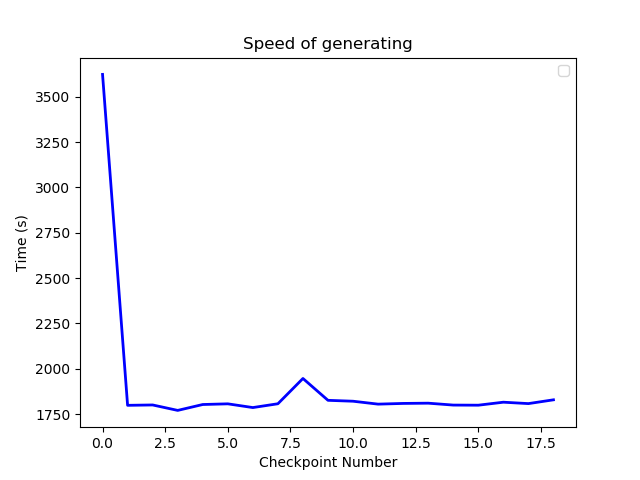

No handles with labels found to put in legend.


In [9]:
figTen = plt.figure(10)
axTen = figTen.add_subplot(111)
axTen.plot(range(len(timelisting)), timelisting, color='blue', linewidth=2)
axTen.set(title='Speed of generating', ylabel='Time (s)', xlabel='Checkpoint Number')

axTen.legend(loc='upper right')